In [53]:
from scipy.stats import norm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/dashabalashova/python_projects/1_1_5_ML_Bioinf/data/spam.csv')


train_df, validate_df = train_test_split(df, test_size=0.2, stratify=df.label)
validate_df = validate_df.reset_index(drop=True)

def Gaussian_naive_Bayes(train_df, validate_df):
    v = [0, 0]
    m = [0, 0]
    for c in [0,1]:
        v[c] = train_df[train_df['label']==c].var()
        m[c] = train_df[train_df['label']==c].mean()  
    
    GNB = []
    for i in range(0, validate_df.shape[0]):
        p_classes = [0, 0]
        for c in [0, 1]:
            p = 1
            for j in validate_df.columns.values[:-1]:
                print(norm.pdf(validate_df.loc[i,j],m[c][j],v[c][j]**0.5)*v[c][j]**0.5)
                p = p * norm.pdf(validate_df.loc[i,j],m[c][j],v[c][j]**0.5)*v[c][j]**0.5
            p_classes[c] = p
        GNB.append(p_classes[1]/(p_classes[0]+p_classes[1]))
        print(p_classes[1]/(p_classes[0]+p_classes[1]))
    return GNB
            

GNB = Gaussian_naive_Bayes(train_df, validate_df) 

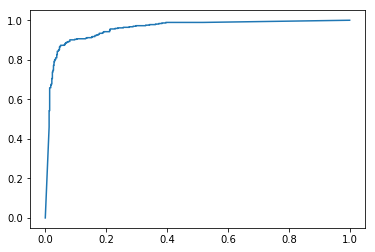

In [52]:
scores = pd.DataFrame(GNB).fillna(0)
fpr, tpr, thresholds = metrics.roc_curve(validate_df.label, scores)

plt.plot(fpr, tpr)
plt.show()